# CIFAR10 dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 50
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
elu_model1 = Sequential()
elu_model1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
elu_model1.add(Activation('elu'))
elu_model1.add(Conv2D(32, (3, 3)))
elu_model1.add(Activation('elu'))
elu_model1.add(MaxPooling2D(pool_size=(2, 2)))
elu_model1.add(Dropout(0.25))
elu_model1.add(Conv2D(64, (3, 3), padding='same'))
elu_model1.add(Activation('elu'))
elu_model1.add(Conv2D(64, (3, 3)))
elu_model1.add(Activation('elu'))
elu_model1.add(MaxPooling2D(pool_size=(2, 2)))
elu_model1.add(Dropout(0.25))
elu_model1.add(Flatten())
elu_model1.add(Dense(512))
elu_model1.add(Activation('elu'))
elu_model1.add(Dropout(0.5))
# a softmax classifier
elu_model1.add(Dense(num_classes))
elu_model1.add(Activation('softmax'))
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
elu_model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
elu_model1_history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    elu_model1_history = elu_model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    elu_model1_history = elu_model1.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 300s 190ms/step - loss: 1.6900 - accuracy: 0.3963 - val_loss: 1.5211 - val_accuracy: 0.4562
Epoch 2/50
1563/1563 [==============================] - 296s 190ms/step - loss: 1.4080 - accuracy: 0.5017 - val_loss: 1.2809 - val_accuracy: 0.5509
Epoch 3/50
1563/1563 [==============================] - 296s 189ms/step - loss: 1.2750 - accuracy: 0.5533 - val_loss: 1.1814 - val_accuracy: 0.5876
Epoch 4/50
1563/1563 [==============================] - 297s 190ms/step - loss: 1.1787 - accuracy: 0.5878 - val_loss: 1.0742 - val_accuracy: 0.6307
Epoch 5/50
1563/1563 [==============================] - 294s 188ms/step - loss: 1.1181 - accuracy: 0.6114 - val_loss: 1.0766 - val_accuracy: 0.6262
Epoch 6/50
1563/1563 [==============================] - 297s 190ms/step - loss: 1.0823 - accuracy: 0.6265 - val_loss: 1.0789 - val_accuracy: 0.6204
Epoch 7/50
1563/1563 [==============================] - 297s 190ms/step - loss: 1.0

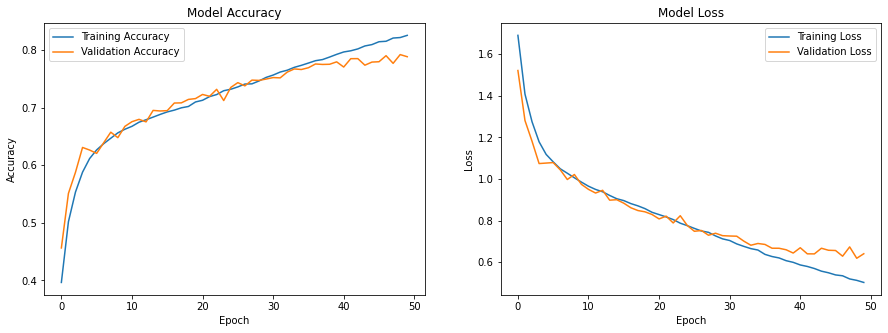

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].plot(elu_model1_history.history['accuracy'])
axs[0].plot(elu_model1_history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Training Accuracy', 'Validation Accuracy'])

axs[1].plot(elu_model1_history.history['loss'])
axs[1].plot(elu_model1_history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training Loss', 'Validation Loss'])

plt.show()

**RMSProp is used with learning rate of 0.0001 and decay of 1e-6. ELU activation function performs good with this data.- 50 epochs are selected.**